## Problem 2

for this problem I have used a picrture of a window curtain with some kind of pattern .

Neccessary library imports for this problem . I will use numpy, math and pandas as the previus problem. 

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext pycodestyle_magic
%pycodestyle_on

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


I will also use PIL is the Python Imaging Library  , I have taken the example from [G4G](https://www.geeksforgeeks.org/python-pil-image-open-method/)

(1024, 1024)

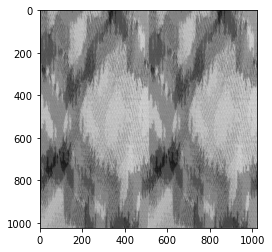

In [19]:
from PIL import Image, ImageOps
bilayer = np.array(ImageOps.grayscale(Image.open('2d_fft.jpeg')))
bilayer = np.resize(bilayer, [1024, 1024])
plt.imshow(bilayer, "gray")
bilayer.shape

This is the Original picture taken by my phone. I have resized it as 1024/ 1024  so that I can use it for fft. 

## FFT of the image
I am using numpy fft for this transfor. 

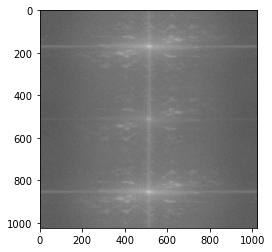

In [26]:
Fbilayer = np.fft.fft2(bilayer)
Fbilayercenter = np.fft.fftshift(Fbilayer)
plt.imshow(np.log(1+np.abs(Fbilayercenter)), "gray")

## Filtering 
Now I am going to use a low pass filter ( I will use the codes from example used in class) 

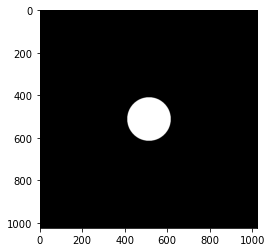

In [27]:
# This is formatted as code
N = 1024
x_size = 10
y_size = x_size  # make it square
x = np.linspace(-x_size/2, x_size/2, N)  # and symmetric around 0,0
y = np.linspace(-y_size/2, y_size/2, N)
R = 1
xx, yy = np.meshgrid(x, y, sparse=True)
lowpass = (np.sqrt(xx**2 + yy**2) <= R)*1
plt.imshow(lowpass, "gray")

Now I am going to apply the filter to the image after transform. I

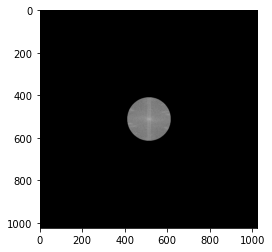

In [24]:
plt.imshow(np.log(1+np.abs(lowpass*Fbilayercenter)), "gray")

Lets have a look after passing our filter . 

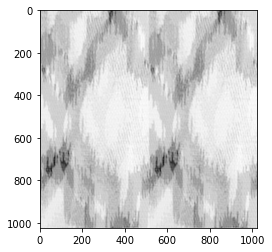

In [29]:
filtered = np.fft.ifft2(lowpass*Fbilayercenter)
plt.imshow(np.log(1+np.abs(filtered)), "gray")

 Well, to me it looks like the filter had removed lot of patterns around the big pattern, makes it look little brighter. 